<a href="https://colab.research.google.com/github/amiralv82/Wavelet-based-Image-Compression/blob/main/wavelet_based_image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Threshold=1] Original: 147.17 KB | Compressed: 146.36 KB | Ratio: 1.01
[Threshold=8] Original: 147.17 KB | Compressed: 115.17 KB | Ratio: 1.28
[Threshold=16] Original: 147.17 KB | Compressed: 100.04 KB | Ratio: 1.47
[Threshold=32] Original: 147.17 KB | Compressed: 88.06 KB | Ratio: 1.67
[Threshold=64] Original: 147.17 KB | Compressed: 80.21 KB | Ratio: 1.83


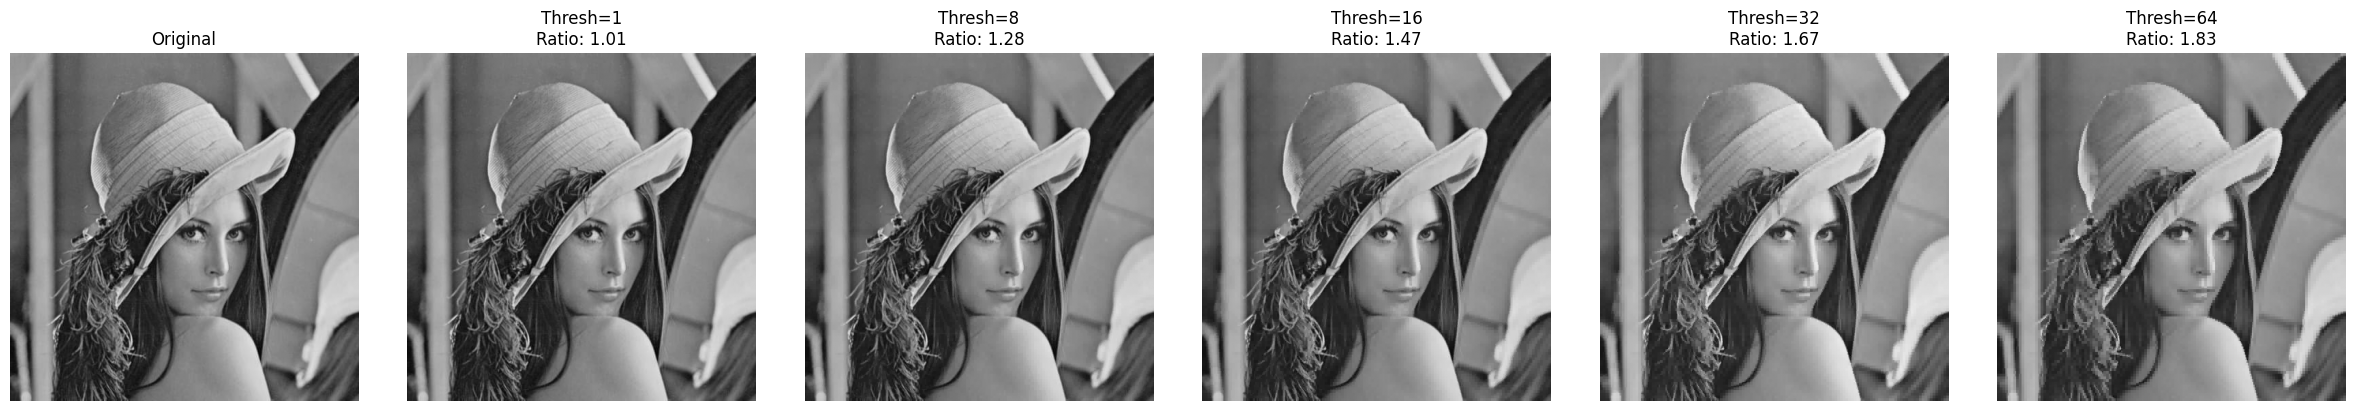

[Threshold=1] Original: 10816.19 KB | Compressed: 10787.18 KB | Ratio: 1.00
[Threshold=8] Original: 10816.19 KB | Compressed: 9290.33 KB | Ratio: 1.16
[Threshold=16] Original: 10816.19 KB | Compressed: 8057.31 KB | Ratio: 1.34
[Threshold=32] Original: 10816.19 KB | Compressed: 6655.32 KB | Ratio: 1.63
[Threshold=64] Original: 10816.19 KB | Compressed: 5557.97 KB | Ratio: 1.95


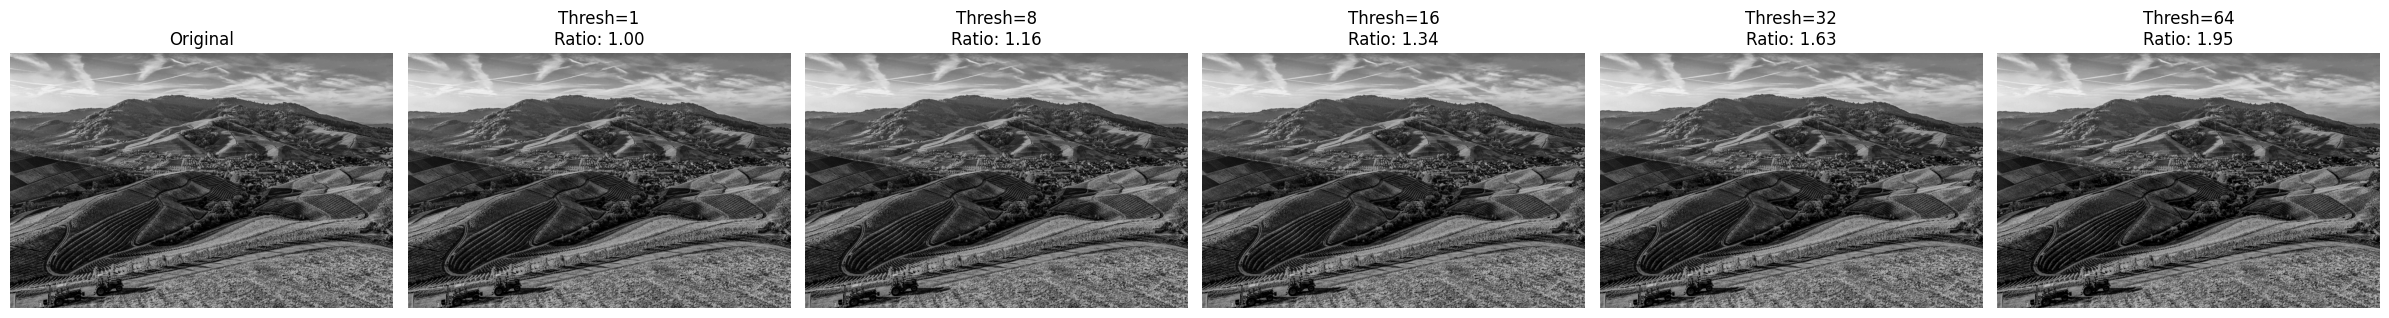

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import os
import cv2

# Function to compress an image using wavelet transform and hard thresholding
def compress_image(img, wavelet='haar', level=2, threshold=10):
    # Perform 2D wavelet decomposition
    coeffs = pywt.wavedec2(img, wavelet=wavelet, level=level)
    coeffs_arr, coeffs_slices = pywt.coeffs_to_array(coeffs)

    # Apply hard thresholding to suppress small coefficients
    coeffs_arr_thresh = coeffs_arr * (np.abs(coeffs_arr) > threshold)

    # Reconstruct image from thresholded coefficients
    coeffs_thresh = pywt.array_to_coeffs(coeffs_arr_thresh, coeffs_slices, output_format='wavedec2')
    reconstructed = pywt.waverec2(coeffs_thresh, wavelet=wavelet)

    # Clip values and convert to uint8 format
    reconstructed = np.clip(reconstructed, 0, 255)
    return coeffs_arr_thresh, reconstructed.astype(np.uint8)

# Function to temporarily save original and compressed images to calculate file sizes
def save_temp_images(original_img, compressed_img, prefix):
    original_path = f"{prefix}_original_tmp.png"
    compressed_path = f"{prefix}_compressed_tmp.png"

    # Save both images
    cv2.imwrite(original_path, original_img)
    cv2.imwrite(compressed_path, compressed_img)

    # Get file sizes
    size_orig = os.path.getsize(original_path)
    size_comp = os.path.getsize(compressed_path)

    # Remove temporary files
    os.remove(original_path)
    os.remove(compressed_path)

    return size_orig, size_comp

# Function to run compression for multiple threshold values and display results
def run_compression_levels(image_path, thresholds):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"❌ Image '{image_path}' not found.")
        return

    # Create subplot for original and compressed images
    fig, axs = plt.subplots(1, len(thresholds) + 1, figsize=(4 * (len(thresholds)+1), 4))
    axs[0].imshow(img, cmap='gray')
    axs[0].set_title("Original")
    axs[0].axis('off')

    original_size = None

    for i, thresh in enumerate(thresholds):
        # Compress image
        _, compressed = compress_image(img, wavelet='db1', level=2, threshold=thresh)

        # Measure size reduction
        size_orig, size_comp = save_temp_images(img, compressed, f"temp_thresh{thresh}")
        if original_size is None:
            original_size = size_orig

        # Show compressed image and compression ratio
        axs[i + 1].imshow(compressed, cmap='gray')
        axs[i + 1].set_title(f"Thresh={thresh}\nRatio: {size_orig / size_comp:.2f}")
        axs[i + 1].axis('off')

        # Print size info
        print(f"[Threshold={thresh}] Original: {size_orig/1024:.2f} KB | "
              f"Compressed: {size_comp/1024:.2f} KB | "
              f"Ratio: {size_orig / size_comp:.2f}")

    plt.tight_layout()
    plt.show()

# Define threshold values to experiment with
thresholds = [1, 8, 16, 32, 64]

# Run compression on given images
run_compression_levels("lena30.jpg", thresholds)
run_compression_levels("4K.jpg", thresholds)